In [135]:
campaign = "xho"

In [136]:
import pandas as pd
from sessionstats import get_folder_data
import copy

session_data = get_folder_data(f"../_{campaign}/sessions")

In [137]:
base_df = pd.DataFrame(session_data, columns=["number", "title", "date", "players"])
base_df.set_index("number", inplace=True)
base_df.tail()

,title,date,players
number,,,
26,"Hec'mal, fedele di Vecna",2023-03-25,"[{'name': 'Xandra', 'player': 'Fede', 'guest':..."
27,In fondo al fiume,2023-04-01,"[{'name': 'Xandra', 'player': 'Fede', 'guest':..."
28,Discussioni e ritrovamenti,2023-04-07,"[{'name': 'Xandra', 'player': 'Fede', 'guest':..."
29,Volo sull'oceano,2023-04-15,"[{'name': 'Nikolaya', 'player': 'Fede', 'guest..."
30,La Fiera del Domani,2023-04-29,"[{'name': 'Nikolaya', 'player': 'Fede', 'guest..."


In [138]:
simplified_data = copy.deepcopy(session_data)

for data in simplified_data:
    for player in data["players"]:
        data[player["player"]] = player["name"]
    del data["players"]

df = pd.DataFrame(simplified_data).set_index("number")
df.tail()

,title,date,Fede,Camilla,Jack,Gimmy,Matte,Salo,Chiara,Red,Delu
number,,,,,,,,,,,
26,"Hec'mal, fedele di Vecna",2023-03-25,Xandra,Estia,NaN,Kaizner,NaN,Rath,NaN,Krieg,Raknar
27,In fondo al fiume,2023-04-01,Xandra,Estia,Kir,NaN,NaN,Rath,NaN,NaN,NaN
28,Discussioni e ritrovamenti,2023-04-07,Xandra,NaN,NaN,Kaizner,NaN,Rath,Kor,Krieg,Raknar
29,Volo sull'oceano,2023-04-15,Nikolaya,NaN,NaN,NaN,NaN,Rath,Kor,Krieg,Raknar
30,La Fiera del Domani,2023-04-29,Nikolaya,Estia,Kir,Kaizner,NaN,Rath,NaN,NaN,Raknar


In [172]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import random

In [173]:
def string_to_colour(string, saturation = None, value = None, shift = 0):
    hash_value = shift
    for char in string:
        hash_value = ord(char) + ((hash_value << 5) - hash_value)

    rand = random.Random(hash_value)
    rgb = np.array([rand.random() for i in range(3)])
    hsv = colors.rgb_to_hsv(rgb)

    if saturation:
        hsv[1] = saturation
    if value:
        hsv[2] = value

    return colors.hsv_to_rgb(hsv)

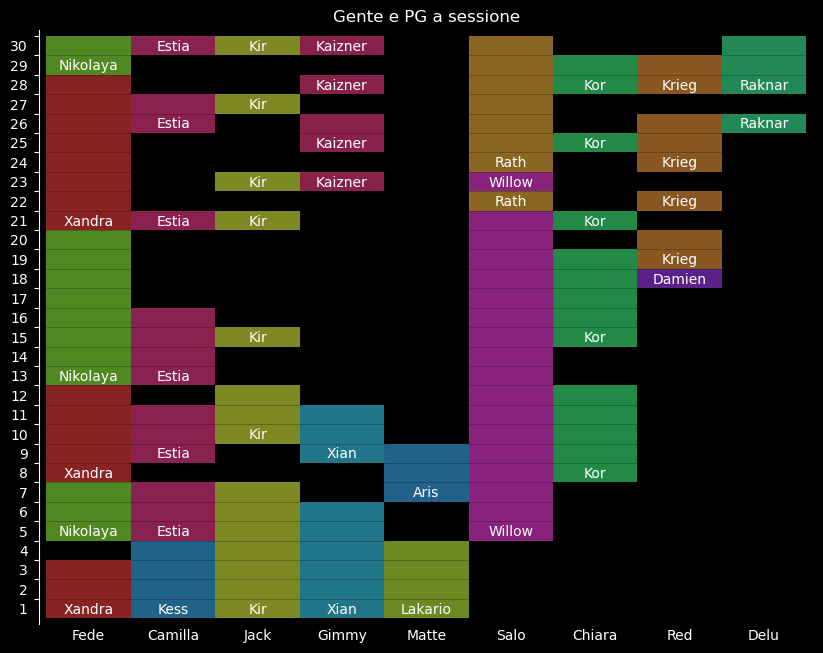

In [209]:
drawseps = True
att_df = df.drop(["date", "title"], axis=1)

# Plot colored table
fig, ax = plt.subplots(figsize=(10,6))

sepcol = [*ax.get_facecolor()]
sepcol[3] = 0.33

rand = random.Random(845)
char_col_offset = 0.
char_colors = {}

for i, col in enumerate(att_df):
    last = None
    for j, idx in enumerate(df.index):
        value = df.loc[idx, col]
        is_diff = value != last
        last = value
        if not pd.isna(value):
            # color = string_to_colour(value, saturation=1, value=0.6, shift=545)
            color = None
            if value in char_colors:
                color = char_colors[value]
            else:
                color = colors.hsv_to_rgb(np.array([char_col_offset / 360., 0.75, 0.6]))
                char_col_offset = (char_col_offset + rand.randrange(90, 150)) % 360
                char_colors[value] = color
            ax.add_patch(plt.Rectangle((i, j), 1, 1, 
                                       color=color, 
                                       alpha=0.9, 
                                       ec=None,
                                       ))
            if drawseps:
                ax.plot([i, i+1], [j, j], color=sepcol, lw=0.5)
            if is_diff:
                ax.text(i+0.5, j+0.45, value, ha='center', va='center', color='white')
ax.set_xticks(np.arange(len(att_df.columns))+0.5)
ax.set_xticklabels(att_df.columns)
ax.set_yticks(np.arange(len(df.index))+0.5)
ax.set_yticklabels(df.index)
ax.set_title('Gente e PG a sessione')
ax.margins(0.01)

ax.set_yticks(ax.get_yticks() + 0.5)
ax.set_yticklabels('')
# Customize minor tick labels
plt.yticks(
    [int(x) - 0.5 for x in df.index], 
    labels=df.index,
    minor=True,
)
ax.tick_params(axis='y', which='minor', length=0, pad=8)
ax.tick_params(axis='x', length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.subplots_adjust(top=1.1)
plt.show();
